In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np



%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [21]:
df_analyse=pd.read_csv(r'E:\Enterprise Data science\Covid-19 Prototype\ads_covid-19\data\processed\COVID_small_sync_timeline_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

,doubling every two days,doubling every 4 days,doubling every 10 days,Italy,US,Spain,Germany,"Korea, South",date
0,100.000000,100.000000,100.000000,155.0,107.0,120.0,117.0,104.0,0
1,141.421356,118.920712,107.177346,229.0,184.0,165.0,150.0,204.0,1
2,200.000000,141.421356,114.869835,322.0,237.0,222.0,188.0,433.0,2
3,282.842712,168.179283,123.114441,453.0,403.0,259.0,240.0,602.0,3
4,400.000000,200.000000,131.950791,655.0,519.0,400.0,349.0,833.0,4


In [22]:
country_list=df_analyse.columns[1:]

# Helper functions

In [23]:
def quick_plot(x_in, df_input,y_scale='log',slider=False):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
    
        
        Returns:
        ----------
        
    """
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,3:-1],
           y_scale='log',
           slider=True)

# Fitting a polynomial curve

In [37]:
df_poly_check=df_analyse.iloc[0:27,3:-1].reset_index()
df_poly_check.head()

,index,Italy,US,Spain,Germany,"Korea, South"
0,0,155.0,107.0,120.0,117.0,104.0
1,1,229.0,184.0,165.0,150.0,204.0
2,2,322.0,237.0,222.0,188.0,433.0
3,3,453.0,403.0,259.0,240.0,602.0
4,4,655.0,519.0,400.0,349.0,833.0


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [41]:
y=df_poly_check[['Italy','US','Spain','Germany']].unstack().sort_index(axis=0,level=1)

y.head()

Germany  0    117.0
Italy    0    155.0
Spain    0    120.0
US       0    107.0
Germany  1    150.0
dtype: float64

In [42]:
y.head()

Germany  0    117.0
Italy    0    155.0
Spain    0    120.0
US       0    107.0
Germany  1    150.0
dtype: float64

In [43]:
test_points=28
y_train=y[0:-test_points-1]
y_test=y[-test_points:]

In [44]:
X_train=np.arange(len(y_train)).reshape(-1, 1)/4.0 
X_test=np.arange(len(y_train),len(y_train)+test_points).reshape(-1, 1)/4.0

In [45]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc={'figure.figsize':(16,8)})

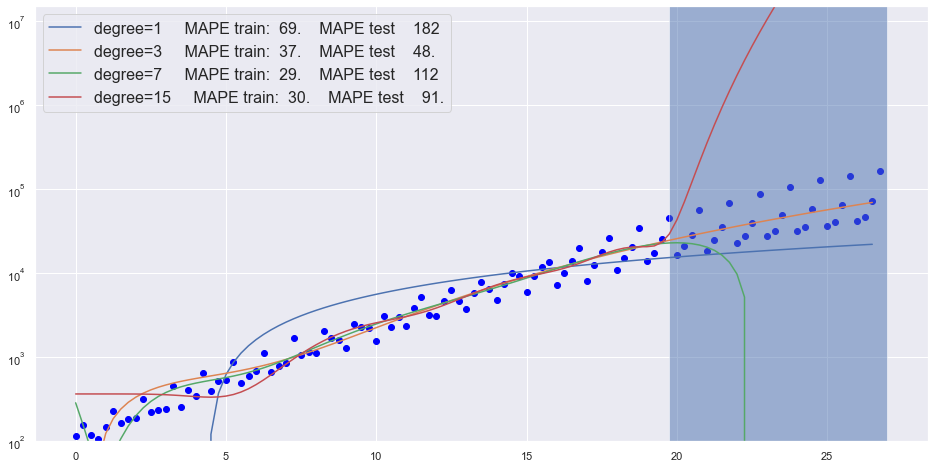

In [46]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,3,7,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100